In [1]:
import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import math
import os
from collections import defaultdict


In [ ]:
def compute_ripley(path):
    regex = re.compile(r"(\d+):\s+(\d+\.\d+):(\d+)")
    collapsed_count_lst_dct = defaultdict(list)
    random_count_lst_dct = defaultdict(list)

    ripleys = [ripley for ripley in os.listdir(path) if 'collapsed' not in ripley]

    for ripley in ripleys:
        with open(os.path.join(path, ripley)) as f:
            print(ripley)
            for line in f:
                line = line.rstrip('\n')
                r = re.search(regex, line)
                if r is not None:
                    random_count_lst_dct[r.group(1)].append(math.log10(int(r.group(3))+1))
                else:
                    print(line)
    with open(os.path.join(path, 'ripley_collapsed.txt')) as f:
        for line in f:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                collapsed_count_lst_dct[r.group(1)].append(math.log10(int(r.group(3))+1))
    d_lst = list(pl.frange(0.2,0.5,0.01))
    #print(random_count_lst_dct)
    random_count_arr = []
    for k in random_count_lst_dct.keys():
        random_count_arr.append(random_count_lst_dct[k])
    random_count_arr = np.asarray(random_count_arr)
    collapsed_count_arr = []
    for k in collapsed_count_lst_dct.keys():
        collapsed_count_arr.append(collapsed_count_lst_dct[k])
    collapsed_count_arr = np.asarray(collapsed_count_arr)

    k = np.mean(collapsed_count_arr, axis=0)
    low = np.percentile(random_count_arr, 0.025, axis=0)
    high = np.percentile(random_count_arr, 0.975, axis=0)
    return k, low, high

In [94]:
k_ffhq, l_ffhq, h_ffhq = compute_ripley('monte_carlo_sampling_1m_1024_imbalanced_adv_loss_finetuning_ripley')

ripley_1.txt
ripley_0.txt
ripley_1.txt
ripley_0.txt


/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: numpy.arange


In [39]:
# for k in random_count_lst_dct.keys():
#     plt.plot(d_lst, random_count_lst_dct[k], 'b^-', label=k[:-4])

# for k in collapsed_count_lst_dct.keys():
#     plt.plot(d_lst, collapsed_count_lst_dct[k], 'rx-', label=k[:-4])

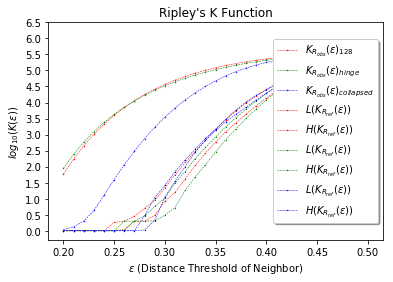

In [101]:
# plt.plot(d_lst, k_128, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128}$')
# plt.plot(d_lst, k_256, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{256}$')
# plt.plot(d_lst, k_512, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{512}$')
plt.plot(d_lst, k_128, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128}$')
plt.plot(d_lst, k_hinge, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{hinge}$')
plt.plot(d_lst, k_collapsed, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{collapsed}$')

# plt.plot(d_lst, k_1, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128-1}$')
# plt.plot(d_lst, k_2, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128-2}$')
# plt.plot(d_lst, k_3, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128-3}$')


# plt.plot(d_lst, l_128, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, h_128, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, l_256, color='g', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, h_256, color='g', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, l_512, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, h_512, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')
plt.plot(d_lst, l_128, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
plt.plot(d_lst, h_128, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')
plt.plot(d_lst, l_hinge, color='g', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
plt.plot(d_lst, h_hinge, color='g', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')
plt.plot(d_lst, l_collapsed, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
plt.plot(d_lst, h_collapsed, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')

# plt.plot(d_lst, k_id_imba, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128}$')
# plt.plot(d_lst, k_id_ba, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{256}$')
# plt.plot(d_lst, l_id_imba, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, h_id_imba, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, l_id_ba, color='g', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$L(K_{R_{ref}}(\epsilon))$')
# plt.plot(d_lst, h_id_ba, color='g', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$H(K_{R_{ref}}(\epsilon))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel('$\epsilon$ (Distance Threshold of Neighbor)')
plt.ylabel('$log_{10}(K(\epsilon))$')
plt.title("Ripley's K Function")
plt.savefig('Ripley', dpi=800)

plt.show()